In [1]:
from keras import layers
from keras import models

D:\anaconda3\envs\Keras_DL_Book\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype(('float32'))/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer= 'rmsprop', loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 37s 36ms/step - loss: 0.1743 - accuracy: 0.9442
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0459 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0318 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0241 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0182 - accuracy: 0.9946


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0273 - accuracy: 0.9915


In [11]:
test_acc

0.9915000200271606

## Section 2

In [7]:
import os, shutil

In [9]:
original_dataset_dir = r"D:\DL_Keras_Book\dogs-vs-cats\train\train"
base_dir = r"D:\DL_Keras_Book\cats_and_dogs_small"
os.mkdir(base_dir)

In [10]:
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,"validation")
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

In [11]:
train_cats_dir = os.path.join(train_dir,"cats")
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,"cats")
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,"cats")
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

In [19]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [20]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [21]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [24]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
print("total training cat images : ",len(os.listdir(train_cats_dir)))
print("total validation cat images : ",len(os.listdir(validation_cats_dir)))
print("total test cat images : ",len(os.listdir(test_cats_dir)))

print("total training dog images : ",len(os.listdir(train_dogs_dir)))
print("total validation dog images : ",len(os.listdir(validation_dogs_dir)))
print("total test dog images : ",len(os.listdir(test_dogs_dir)))

total training cat images :  1000
total validation cat images :  500
total test cat images :  500
total training dog images :  1000
total validation dog images :  500
total test dog images :  500


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [15]:
from keras import optimizers
model.compile(loss="binary_crossentropy", optimizer = optimizers.RMSprop(learning_rate=1e-4),
             metrics=['accuracy'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode="binary")
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, 
                                                        class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print("Data Batch Shape : ", data_batch.shape)
    print("Labels Batch Shape : ", labels_batch.shape)
    break

Data Batch Shape :  (20, 150, 150, 3)
Labels Batch Shape :  (20,)


In [18]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                             validation_data=validation_generator, validation_steps=50)

C:\Users\jnrah\AppData\Local\Temp\ipykernel_19876\2751951621.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,


Epoch 1/30
100/100 [==============================] - 52s 507ms/step - loss: 0.6897 - accuracy: 0.5440 - val_loss: 0.6880 - val_accuracy: 0.5020
Epoch 2/30
100/100 [==============================] - 40s 399ms/step - loss: 0.6489 - accuracy: 0.6130 - val_loss: 0.6284 - val_accuracy: 0.6470
Epoch 3/30
100/100 [==============================] - 39s 393ms/step - loss: 0.5957 - accuracy: 0.6645 - val_loss: 0.6085 - val_accuracy: 0.6600
Epoch 4/30
100/100 [==============================] - 40s 397ms/step - loss: 0.5609 - accuracy: 0.7160 - val_loss: 0.5875 - val_accuracy: 0.6950
Epoch 5/30
100/100 [==============================] - 40s 396ms/step - loss: 0.5314 - accuracy: 0.7325 - val_loss: 0.5979 - val_accuracy: 0.6840
Epoch 6/30
100/100 [==============================] - 45s 454ms/step - loss: 0.5044 - accuracy: 0.7460 - val_loss: 0.5982 - val_accuracy: 0.6760
Epoch 7/30
100/100 [==============================] - 42s 421ms/step - loss: 0.4772 - accuracy: 0.7655 - val_loss: 0.5828 - val_ac

In [19]:
model.save("cats_and_dogs_small_1.h5")

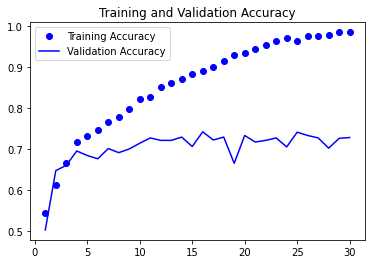

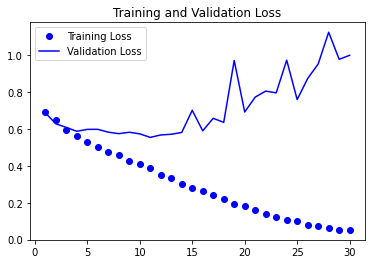

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

In [21]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                            shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

In [22]:
from keras.preprocessing import image

In [23]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [24]:
img_path = fnames[3]

In [26]:
img = image.image_utils.load_img(img_path, target_size = (150, 150))

In [27]:
x = image.image_utils.img_to_array(img)
x = x.reshape((1,) + x.shape)

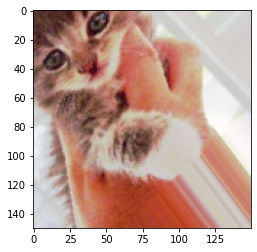

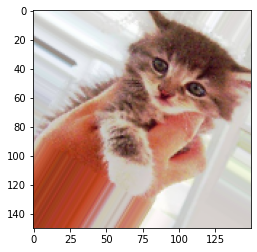

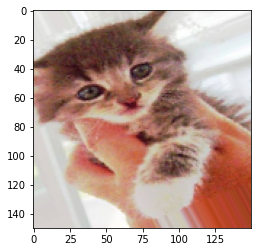

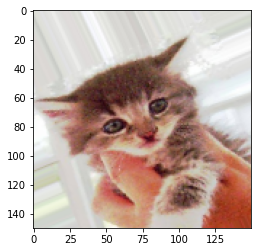

In [28]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure()
    imgplot = plt.imshow(image.image_utils.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [37]:
model.compile(loss="binary_crossentropy", optimizer = optimizers.RMSprop(learning_rate=1e-4),
             metrics=['accuracy'])

In [38]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                  shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode="binary")
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150), batch_size=20,
                                                        class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 46s 449ms/step - loss: 0.6956 - accuracy: 0.4965 - val_loss: 0.6820 - val_accuracy: 0.5850
Epoch 2/100
100/100 [==============================] - 42s 419ms/step - loss: 0.6828 - accuracy: 0.5430 - val_loss: 0.6724 - val_accuracy: 0.5440
Epoch 3/100
100/100 [==============================] - 42s 418ms/step - loss: 0.6725 - accuracy: 0.5765 - val_loss: 0.6591 - val_accuracy: 0.5970
Epoch 4/100
100/100 [==============================] - 42s 418ms/step - loss: 0.6599 - accuracy: 0.5845 - val_loss: 0.7316 - val_accuracy: 0.5410
Epoch 5/100
100/100 [==============================] - 42s 419ms/step - loss: 0.6502 - accuracy: 0.6090 - val_loss: 0.6151 - val_accuracy: 0.6470
Epoch 6/100
100/100 [==============================] - 42s 419ms/step - loss: 0.6259 - accuracy: 0.6460 - val_loss: 0.6068 - val_accuracy: 0.6580
Epoch 7/100
100/100 [==============================] - 42s 418ms/step - loss: 0.6134 - accuracy: 0.6495 - val_loss: 0.6478 -

Epoch 57/100
100/100 [==============================] - 42s 422ms/step - loss: 0.4445 - accuracy: 0.7955 - val_loss: 0.4628 - val_accuracy: 0.7770
Epoch 58/100
100/100 [==============================] - 42s 423ms/step - loss: 0.4600 - accuracy: 0.7815 - val_loss: 0.4657 - val_accuracy: 0.7780
Epoch 59/100
100/100 [==============================] - 41s 414ms/step - loss: 0.4582 - accuracy: 0.7895 - val_loss: 0.4454 - val_accuracy: 0.8000
Epoch 60/100
100/100 [==============================] - 41s 412ms/step - loss: 0.4449 - accuracy: 0.7950 - val_loss: 0.5019 - val_accuracy: 0.7660
Epoch 61/100
100/100 [==============================] - 41s 412ms/step - loss: 0.4363 - accuracy: 0.7915 - val_loss: 0.5014 - val_accuracy: 0.7320
Epoch 62/100
100/100 [==============================] - 42s 418ms/step - loss: 0.4449 - accuracy: 0.7950 - val_loss: 0.4748 - val_accuracy: 0.7880
Epoch 63/100
100/100 [==============================] - 41s 414ms/step - loss: 0.4423 - accuracy: 0.7960 - val_loss: 0

In [41]:
model.save("cats_and_dogs_small_2.h5")